# Video 2:
- inside blog/views.py
- home function: handle the traffic from the home page of our blog (takes in request argument)
    - will return what we want the user to see when they are sent to this route
    - logic for where we want to handle certain routes
    - at first returning an http response that says we have landed on the blog home page
        - haven't yet mapped our URL pattern to this view function just yet
            - create a new bot module in our blog directory called urls.py and in that file is where we will map the urls that we want to correspond to each view function

- within blog app directory we create a urls file
    - import views from current directory -> from . import views
    - then creating a path for our blog homepage
        - path('', view that we want to handle the logic at that home page route, name path)

- this view still would not work quite yet because we have a URLS module in our main project directory as well and that URLS module will tell our whole website which URLS should send us to our blog app
    - in blog_site directory:
    - we are going to tell Django which route should get mapped to our blog URLS
    - import include function from django.urls -> allows us to specify which route should go to our blog urls
        - path('blog/', include('blog.urls')
        - now when we open our webpage in the browser and go to /blog then it will map that to our blog URLs and then within our blog urls we hae the empty path that maps onto our home view

- WALKTHROUGH: (of above)
    - when we navigated to /blog in our website it first looks in our projects urls.py module in the main project
        - it says ok, is there a pattern that matches (there is the second one), so now that it matched it says ok where do I want to send people who go to this route ---> it will send them to blog.urls
            - whenever django comes across the include function it chops off whatever has matched up to that point and only sends the remaining string to the included urls module for further processing. It had already processed the /blog part of the url so it is only going to send what is remaining to the blog urls. Because there is nothing remaining it is going to send an empty string to blog.urls
        - open up blog.urls and it says ok now I have an empty string so it looks for a pattern that matches an empty route and that pattern will be handled by the function views.home
        - now we navigate to our views file and view the home function and the function just says hey lets return this HTTP response an h1 tag that says blog home


- add another route to the blog -> ABOUT PAGE
    - 1) in /blog/views add a function about that contains the logic -> now we have an about view
    - 2) now within our blog urls module we will want to set up the mapping for the path and that view function
        - path('about/' , views.about, name="blog-about")
        - do we need to add anything to our project urls module? No, because that just tells the website that when someone goes to our blog route to send them to our blog urls and then our blog urls will handle it from there

- WALKTHROUGH: (of above):
    - we navigate to /blog/about and first it will check the url patterns in our project urls module
    - application is saying okay, someone has navigated to /blog/about are there any patterns that match this? Yes, so it sends to blog.urls for further processing (chops off part that already matched and only sends remaining string)
    - now it is in the blog directory in the urls folder. Here it asks, "do I have anything that matches 'about'?"
    - it finds the pattern and goes to views.about and calls the function which returns an http response
 
 
- What if we wanted our blog to actually be the home page of our entire website?
    - right now we are going to /blog
    - in order to do that, within our project urls we can simply leave the path to our blog urls empty
        - it will match the empty path in our project urls and also the empty path in our blog urls and just return the blog homepage

# Video 3: Templates

## Learning how to use templates to return more complex HTML code and how to pass variables to our templates as well

### Starting within views module of blog app
- HTML code usually contains a head tag, body tag, etc.. 
- currently we are just returning simple h1 tags
- SOLUTION -> use templates
    - create a templates directory within our blog app directory
    - within blog app create a directory called templates
    - by default, django looks for a templates subdirectory within each of our installed apps
    - since django may be looking in other locations for additional templates, we're going to want to create another subdirectory within our templates directory with the same name as our app, so we know these are the templates specific to this blog application (django convention)
        - blog -> templates -> blog -> template.html

### Making the templates 
- blog -> templates -> blog -> template.html
- now within the folder we will make a template for each view we currently have.. the home and about pages
- Do home route and template
    - once the template is ready, we have to add our blog application to our list of installed apps so that Django knows to look there for a templates directory (recommended that we add our app configuration to our project settings.py module
    - app configuration is located inside our apps.py module in blog directory
    - copy BlogConfig from apps.py 
    - go to settings.py file where we need to add the path to this class within the installed apps list -> 'blog.apps.BlogConfig'
- Now we will make it so we return that temnplate whenever anyone navigates to our home page
    - have to point our blog views to point to those templates
    - will use a shortcut which is in the django shortcuts module (from django.shortcuts import render)
    - now we will return a rendered template instead of our http response
        - use render(request, template name to render) -> reference templates by specifying our subdirectory within our directory (blog) followed by the name of our template -> blog/home.html
        - third optional argument is a context which is a way for us to pass information into our template
    - views always need to return an http response or an exception
    - do the same thing for the about page
- What if we have posts that we want to display in our templates? How would we do that?
    - add dummy data to the top of the views file (create fake posts)
        - basically pretending for now that we made a database call and got back this list of posts and we want to display these posts on our blog home page
        - we can display these posts just by passing an argument with our data
        - create a context dictionary in the home function with key 'posts' and value is list of dummy posts
            - now we can pass that context in as our third arg in the render function (passes our data in with our template and we can access it within the template)
            - whatever key name we used within this dictionary that we passed in will be accessible from within the template and it will be equal to that value -> basically gives us access to this post variable
    - in home template we need to loop through those posts in order to display them on the home page (template engine)
- Can use conditional logic in the html files with template engine. 
    - Say we wanted to pass a title to our web pages, but if we didnt pass title we would use a default of Django blog
    - Added if else logic for title in the html files.. We decide to pass a title in for the about page but not for the home page (let that one use the default)

### Cleaning up the template design -> right now there is a lot of repeated code which is not good practice
- if we want to update one of those sections, then we would need to update it in every location which becomes tedious when you have a lot of pages
    - have everything that is repeated in a single place so there is only one place where things need to be updated
- solution -> template inheritance
    - we create a base.html file in the templates directory we find the repeated code
    - block section is a section that child templates can override
    - basically copied the repeated code from the two files... then where the code differed he created a block which the child templates will be able to override
    - after creating the base template, he goes back to the other html and removes all the code that is in the base template already...

### Bootstrap : popular library that allows you to add styles to your website
- using this to show the power of template inheritance
- go to the bootstrap documentation and copy what is needed from the starter template into our base template so all the children pick up on it and can use it
    - the CSS and javascript that this is using are all served from a content delivery network
        - basically means that there is nothing that we actually need to download
    - should allow us to use bootstrap specific CSS classes
        - to use one of those classes he is going to wrap our content in a div (<div> </div>) with the class of container which will give the content some good padding and spacing
        - we want the div to have a bootstrap class and that bootstrap class is going to be called "container"

### Recap:
- we created a base template that other templates will inherit from and this is the main structure of our html that is going to be included on every single page
- you can have multiple blocks but right now we only have a single block called content and that content block is what our other templates can override
    - when they override that content block with data, it will place that data at this location in the html (within the container div)

### Adding a navigatin bar and some global styles to our website so it looks nicer and similar to final product
- SNIPPET 1 (NAVIGATION BAR) :
    - He pastes the first snippet to the very top of our body because it is the navigation bar
- SNIPPET 2: (MAIN SECTION -contains our content block
    - scrolls down to our old container div to our content block -> this is going to be a replacement for that
    - we get rid of that old div that contains our content block
- SNIPPET 3: he has a few cutom styles that are not bootstrap specific -> main.css
    - we need to actually put this somewhere in our project
    - Django static files like CSS and javascript need to be located within a static directory in our app
    - we create a directory within our project called static
        - static directory lives within our root directory of our blog app
        - just like with our templates we will want to create another subdirectory with the same name of our app inside our static directory
        - within the blog folder in the static directory we create the main.css file and paste the snippet in
    - now we have a CSS file and in order to include that in our base template, we are going to need to include a couple of lines
    - we go back to our base template and we want to put our main.css file in our template
    - so above the title but first we have to load our static files
        - to do this we need to open up a code block -> he puts it at the very top of base.html
        - {% load static %} -> makes it so we can load in that CSS file from our static directory
        - now we can add our CSS file above the title like he wants
        - we open up a link tag and the href is where the static file is located 
        - link rel="stylesheet" type="text/css" href="{% static 'blog/main.css' %}>"
            - what the static does above is generates an absolute URL of the static files and then accesses that blog main CSS

### Visually split up the blog posts
- the CSS that we already added has some styles for that, we just need to put in the correct HTML 
    - within the snippets folder we access snippet article.html
    - this is going to be the HTML and CSS for a specific blog so we are going to put this in our for loop for our blog post which is currently in our home template
    - open up our home template and within the for loop we get rid of current html

## Change to make our templates better and more flexible
- within our base.html we go to our navigation tag in the body 
- right now the home link and about link are hard coded to these locations
    - if routes were hard coded in the template then any time we wanted to change these routes we would also have to change the href (urls) in our templates
    - we can change the django url tag in order to get the absolute path to a given url pattern
    - anytime we reference a URL in a template it is probably best to use the URL tag and then the name of the route instead of hard coding those in because if they change then the url tag will change with them

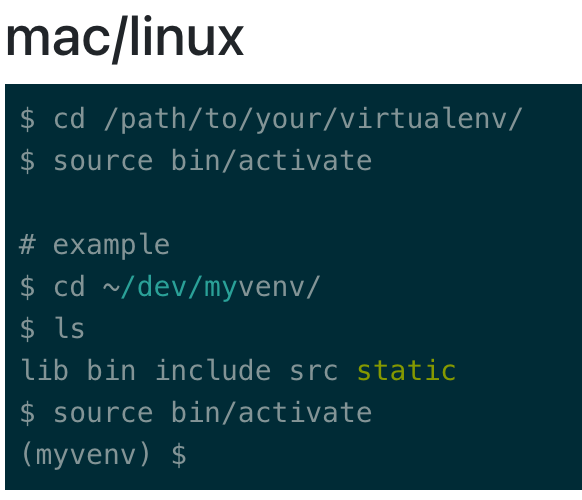

# Video 4: Admin Page:

## Learning how to access the admin page of our Django site
- the admin page is a great way to see what data is on our site and gives us a nice GUI for creating, updating, our deleting that data 
- go to home page and navigate to /admin
- we have to create an admin user
- command:
    - python manage.py createsuperuser
    - it does not work initially because we haven't created the database we are using for this project yet 
        - run a few migration commands to accomplish this
        - database migration allows us to apply changes to a database
        - the first migration will create the database and create a bunch of default tables for us 
            - python manage.py makemigrations
            - makemigrations detects the changes and prepares django to update the database but it doesn't run the changes yet
            - to apply we need to say: python manage.py migrate
        - auth_user table should now exist
        - if we rerun "python manage.py createsuperuser" it should work 

### username, email, password
- username: caseyquinn20
- password: Bebop2022
- email: casey.quinn@tamu.edu

- now we should be able to login to the admin page as the superuser with the credentials we just created
- allows us to do a lot of work on the backend that would take a ton of work if we were to do it on our own

## creating a new user on the admin page 
- testUser -> Bebop2022

# Video 5: Database and Migrations

## We will be creating our own database tables for our application so that we can create real posts instead of working with dummy data
- in order to work with these databases, Django has its own built in ORM
- ORM: object relational mapper -> allows us to access our database in an easy to use object oriented way
     - you can use different databases without changing our code
     - you could use SQLite database for testing and POSTGRES for production by setting up a different database in our settings but the code for querying will still be the same
     - we will use an SQLite for development and a PostGres for production
     - we will set up database structure as classes and you will hear them being called models
         - we are doing it this way because it is very intuitive after getting the hang of it

- within blog app dir we open up models.py
- the main things we are going to have for our application are users and those will be the authors of our posts and then we will have the posts themselves

### Making a post model that inherits from the django model class
- each class is going to be its own table in the database 
- create attributes -> each attribute will be its own field in the database
    - title field will be a character field that has a max length of 100 characters
    - content field will be a text field which is similar to a character field but with our content here
        - unrestricted text
    - we also have a datetime field -> we can pass in an argument "auto_now_add=true" that sets the datetime only when this object is created 
        - however, there is a caveat -> if we do it like this we can never update the value of the date posted so it will have to keep exact datetime of when the post was created 
        - he likes having the option of changing the dates for the posts so he is going to add an argument
    - he imports timezone from django.utils which will take our timezone settings into consideration so 
        - we pass in a default argument and pass a function timezone.now -> we don't call the function because we don't want it to actually execute at that point
- we also need an author for each post and this will be the user that created the post 
    - import user model 
        - post model and user model are going to have a relationship since users are going to author the posts
        - from django.contrib.auth.models import User
        - there will be a one to many relationship because one user can have multiple posts but a post can only have one author
            - to do this in django we can use a foreign key 
            - authors = models.ForeignKey(User, on_delete=models.CASCADE) -> on_delete tells django what we want to do if the user who created this post gets deleted (set it to none? delete the post? ) -> for this app we'll say if the user is deleted we are going to delete the post as well
            - only a one way street -> if you delete a post you don't want to delete the user
- need to run migrations to update the database with any changes
    - rerun migrations: create-> python manage.py makemigrations
- before running migrate command to create the table in the database he shows how to view the SQL code that will be run on the database from the file 0001_initial.py in migrations directory 
    - python manage.py sqlmigrate blog 0001 (app name and migration number)
    - it takes the simple class that we created and writes out the SQL for all the fields that will be compatible for the database we are using
    - makes it so we don't even really need to know SQL to work with the database we just used the python models class
- run migrate command so changes take place on the actual database
    - python manage.py migrate
- migrations are useful because it allows us to make changes to our database even after its created and has data in that database -> without migrations you would have to run some complex sql to update the database structure so that it doesn't mess with the data
- then he shows us how to query the database through the classes (allowed by django ORM)
    - runs the django python shell which allows us to work with the models interactively line by line
    - python manage.py shell -> looks like python prompt -> can run python or work with django objects
    - imports post model -> from blog.models import Post
    - from django.contrib.auth.models import User
        - query the users table to see if we can see the users we already created
        - User.objects.all()
        - User.objects.first()
    - can filter using filter method -> filter by a field
        - User.objects.filter(username='caseyquinn20')
        - User.objects.filter(username='caseyquinn20').first() -> looking at that user
        - user = User.objects.filter(username='caseyquinn20').first() -> captures the user in a variable
            - now we can look at the user by accessing the attributes
            - user.id
        - now that we have this user we can make a new post and make this user the author of the post
        - as of now we don't have any posts -> can check by saying Post.objects.all()
    - creating a post object
        - post_1 = Post(title='Blog 1', content='First post content!', author=user)
        - save it to the database -> post_1.save()
        - when we view it, it is not very descriptive when we print it out so we have to tell it what we want to see when we print it out
            - use this method: 
    - shows how to get all the posts written by a specific user
        - django has a special query for the user model that allows us to do this easily
        - name of related model_set
        - user.post_set.all()
        - we can create a post directly using that set
            - user.post_set.create(title='Blog Post 3', content='Bebop is a dog.')
    - now we are going to replace the dummy data with the actual data from the database
    - make some queries to get the data and pass it to the views
    - from .models import Posts
    - now within home view instead of passing in dummy data, we will instead query all our posts from our database

### Adding posts to the admin page so they can be updated/deleted
- navigate to blog/admin.py
- this is where we can register our models so they show up on our admin page
- from .models import Post
- register by saying admin.site.register(Post)

# Video 6: User Registration
- learing how to use forms and also how to validate user input to create a user registration page 

## Create registration page where a user can create an account on website and be able to login and logout
- we need to think about how the user logic will relate to our project as a whole
- the user account portion of our project is going to have its own forms/templates/routes/etc...
    - logically going to be separate from the blog itself
    - create a new app inside of our project where all of that is going to be contained in its own section

### Create the new app from the command line
- python manage.py startapp users
- now we want to create a user registration page where users can sign up and create accounts from the front end of our website
- when we first create a new app we need to remember to add it to the list of installed apps in our project settings 
    - open up the users app and go to apps.py file and check the user config class
    - add it to installed apps (users.apps.UsersConfig)

### Creating the view that will handle the logic for register route
- write the register function
    - need to create a form that is going to be passed to the template that we will create for this view
    - creating forms from scratch is complex -> process that is so common that we do not need to reinvent the wheel because django takes care of this on the backend
    - we can create Python classes and these classes generate HTML forms for us and some classes already exist
    - we can use the user creation form that django provides
        - from django.contrib.auth.forms import UserCreationForm
        - create an instance of the user creation form
        - render a template that uses this form
        - now we need to create the template that uses the form passed into the render function 
            - return render(request, 'users/register.html', {'form': form}) # last arg is the context

### Create the template that uses the form passed into the render function for register view
- create a templates directory within our users app just like we did with the blog app
- remember within templates it is the django convention to create another subdirectory with the name of the app
    - now within this subdirectory in templates we can create our template (register.html)
    - we are going to extend the base template again and fill in our content block
    - even from within our users app we can reference templates from our blog app
    - now we want to put our form within a div with the class of content-section for styling
        - within the div we are going to create a new form with a method POST (will fill us in on this later)
        - within the form we need to add something called a CSRF token (hidden tag that we need to add but he said not to worry about what it does .. it is adding something called CSRF which stands for a cross-site request forgery token which protects our form against certain attacks which django requires
        - once token is in place we can access the form variable passed into the context of this template
        - he first puts in a fieldset tag which is used to group related elements in a form
        - he gives the form a legend which gives the form a little more detail
        - now we print the form by accessing the variable that we passed into the context
    - add a submit button after the field set and we add some styles to make it look nicer
        - puts it in a div with class of form-group
        - he creates a button which is going to be the submit button
        - he gives the button some bootstrap classes as well to make it look a little nicer
    - remember we are creating a register page where new users are going to create accounts
        - most websites have a link saying do you already have an account, if you already have an account then just go sign in instead of creating a new account 
        - underneath the form he is going to put another div that we gives some classes as well to separate it out a bit
        - classes he gives are border-top and pt-3 (border and padding)
        - uses small text and gives it a class text-muted which in bootstrap is just like dull text which doesn't stand out a lot
        - Already Have An Account -> link to sign in page using an anchor tag 
     - need to create a URL pattern that uses our register view so that we can navigate to this page in the browser
     - in the blog app we created our own urls module for the blog and we could do the same thing here but he is going to hold off for now and just import the view directly within our projects URL module and create a URL pattern for it there
         - opens up project urls and imports the view directly -> from users import views as user_views
         - underneath admin in url patterns he creates another path and if they go to /register it will send them to the register view that we just created
             - path('register/', user_views.register, name='register')
     - viewed the register page and it was working and will improve upon how it looks by using a form method call called as_P which will render our form and paragraph tags and at least that will split it up into a few more lines than it is now
         - so within the register template he goes to the form var and calls the function form.as_p and that will render the form in paragraph text
     - as of now if we fill out the form and click submit it just redirects us to the current page and wipes out all of the information that we just entered
     - it is not currently doing anything with that information right now
         - it is currently performing a post request on our register route the form information that we submitted
         - there are multiple kinds of HTTP requests... a get request is when you click something to navigate to a page and a post request 
         - when we created our form we said that the method we wanted to use for that form was POST and because we didn't specify where to post that form data it actually just posts it right back to this route 
             - we can put in a conditional and specify that if we get a post request we can try to validate our form data because that post request is going to going to contain that data in the message body and if it is a get request we will display the blank form 
             - we are going to need to validate the data so that we know we are getting the fields and data that we expect
             - to do this we can use another conditional after we instantiated the form with the post data 
             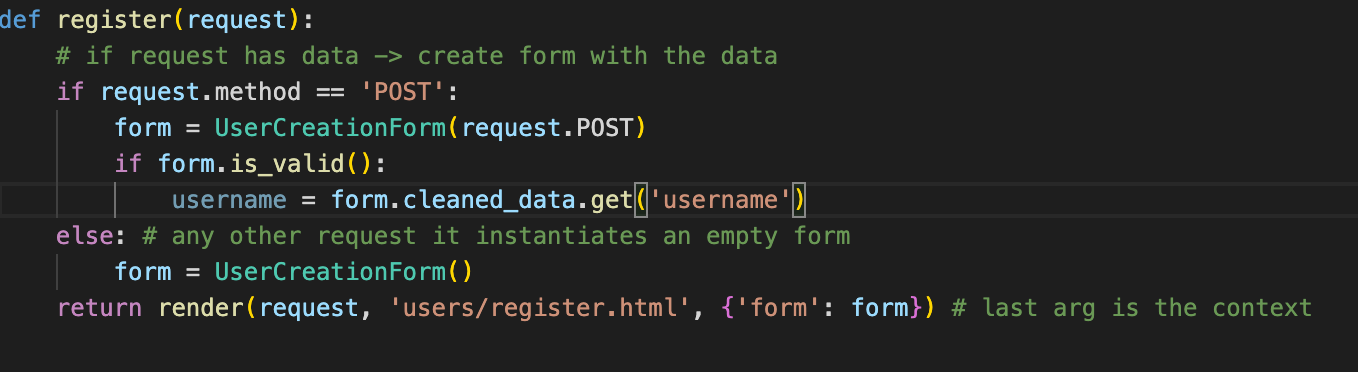
         
         - he is going to use something called a flash message to show that we have received valid data
         - a flash message is an easy way for us to send one-time alerts to a template that will only be display once and will disappear on the next request 
         - first we need to import this -> from django.contrib import messages
         - the different types of messages: message.debug, message.info, message.success, message.warning, message.error
         
    


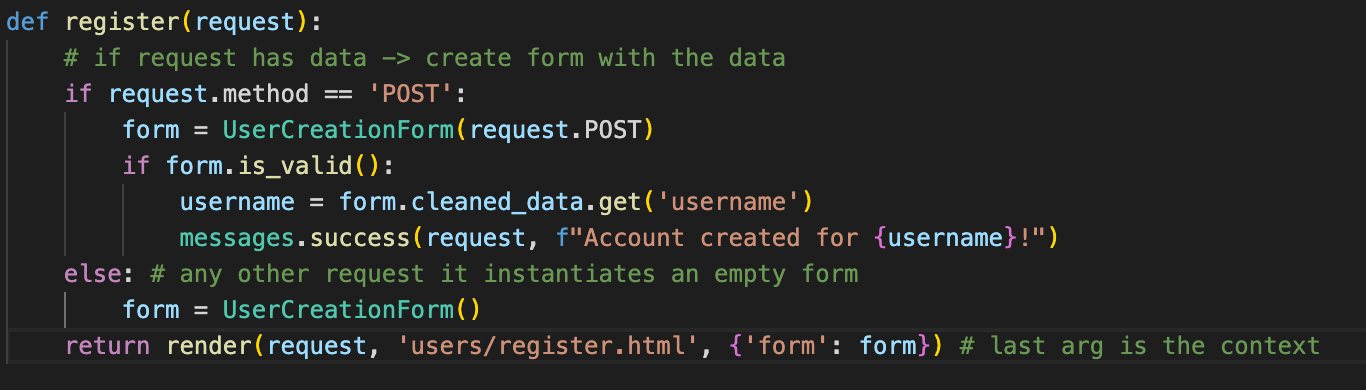
- after sending the message we do not want the user to fill out a form and then just get redirected back to the same form because that would be a little confusing depending on what the form is so instead lets redirect the user back to the home page 
    - to do this we are going to need to import the redirect function which is in the same shortcuts module as the render function
    - return redirect('blog-home') -> blog-home is the name we gave to our url pattern for the blog home page
- we need to update our template to show the flashed messages
    - going to put within our base template so that any flashed messages will pop up on any page 
    - a good place for our flashed messages will be right above our content block 
    - we add a conditional where if django sees that we have flashed messages that we have sent into our template then now we can loop over the messages
    - in the for loop we create a div class and use a bootstrap class called alert and access the message tags so it will work with whatever type of message
    - within the div class we print out the message 
- test to see if our form validates properly 
- we didn't yet actually create an account for that user tho but we know that our forms are validating correctly and giving us some type of feedback

### Walking through the process of submitting an invalid form
- looking at the register view
    - when we submitted our form it comes in as a post request so it comes into the conditional
    - if the request was a post request then it creates a new form that has the data that was within the request.POST so it has a new form with the username data and the two password fields 
    - and then it says ok, is our form valid? -> this is where django does the backend checks with our user creation form and the user creation form handles all of that for us and it fails because it is not valid 
    - it falls down to the return statement at the bottom and renders the html template

### Set it up so it is actually saving the user when our form validates -> after we get that working he wants to add an additional field and have the user enter their email address as well 

### He also wants to get the form looking a lot nicer and also display validation feedback in a better format to fix errors quickly

#### Actually create the user:
- in register function:
    - if we go into the conditional where we check if the form was actually valid, then it is simple as saying __form.save()__
    - this will automatically hash the password to make it secure
    - we test it out by creating a new user

#### Adding fields to form so the user can enter an email address
- in order to add a new field we actually have to add that to the form itself
- how do we add a field to our user creation form?
    - we have to create a new form that inherits from our user creation form
    - first create a file in users application directory called forms.py where we can put these new forms
    - within forms.py we will create our first form that inherits from our user creation form
        - from django import forms
        - from django.contrib.auth.models import User
        - from django.contrib.auth.forms import UserCreationForm
        - now we'll create a form that inherits from the user creation form 
    
    

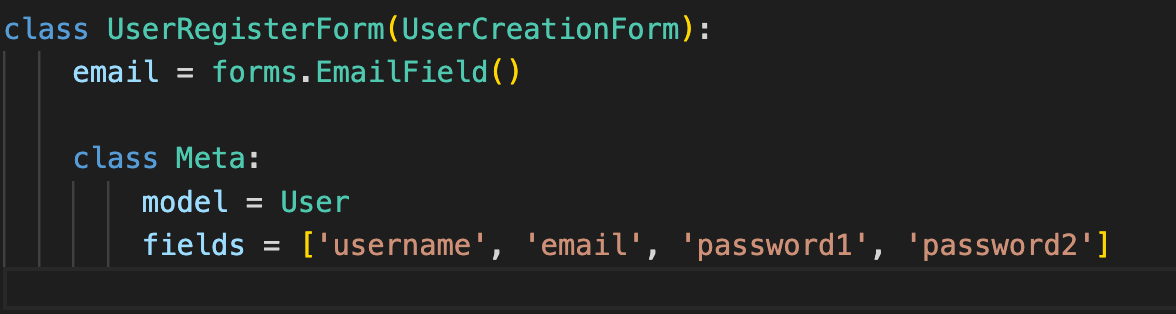
- email can argument called required so we could required equal to false if it was optional for them to provide their email but the default is required=true (we leave the default)
- within the class meta he is going to specify the model that we want this form to interact with 
     - the model is going to be user because whenever this form validates it is going to create a new user
     - the fields are what is going to be shown on our form and in what order 
- the class Metas gives us a nested namespace for configurations and keeps the configurations in one place
    - within the configuration we are saying that the model that will be affected is the user model 
- now we can use this form in our view instead of the user creation form 

#### We go back to the register view and inherit the form that we just created 
- .forms import UserRegisterForm
- now we can user the UserRegisterForm with the email field instead of the user creation form
    - replaces it in the 2 spots in the function
- we reload the register page and now their is a field for email
- we create another user to test

### Cleaning up the styles on the register page -> right now it is not using the bootstrap classes that the rest of the site is utilizing
- can display registration problems in red so that they pop out a little bit
- there are ways that we can set classes on our form fields in the forms.py file
    - he does not want to do that because it mixes the presentation with the backend logic
    - wants to do all of that styling within our template
- we are going to use a third party django application that makes working with forms much easier 
    - CRISPY FORMS - allows simple tags in template that will style forms in a bootstrap fashion
    - need to install crispy forms
        - pip install django crispy forms
        - once that is installed we need to tell django that this is an installed app and we can do this within our projects settings 
        - we also can tell crispy forms which CSS framework we want to use .. it defaults to bootstrap2 but we will use bootstrap4 because that is outdated (now 3 years later lol)
            - CRISPY_TEMPLATE_PACK = 'bootstrap4'
        - now we can load this into our template and use it 
    - we open up register.html template where our form lives 
    - right under where we extend the base template we will load in the crispy form tags and we do this by simply creating code block and load it -> {% load crispy_forms_tags %}
    - we go down to the form code and specify we want to use a filter -> {{ form | crispy }}

# Video 7: User Login System

## Learning how to create a user authentication system for our django application so users can login and logout

## Will also make it so users have to be logged in to access certain pages
- we need a login page on the frontend
- django has a lot of this functionality for us on the backend already 

#### Will get started by using their default login views
- will import login and logout views from within project urls module 
- from django.contrib.auth import views as auth_views
- now that they are imported we can create paths for those views
    -  path('login/', auth_views.LoginView.as_view(), name='login'),
    -  path('logout/', auth_views.LogoutView.as_view(), name='logout'),
- these views are class based views -> handle the forms and the logic and all of that stuff for us but its not going to handle the templates which is ok because we want to make the templates anyways (want them to match our current look and style of our site)
- we will put our login/logout templates inside of our user templates alongside our register page

#### We create the login template within users app
- we will extend our base template and display our form that the login view will be passing to this template -> similar to register template
    - update it for the login page and add url to href attribute in the div tag under the form 
    - Need An Account? ----> update href to have url to the register page 
    - we also go back to the register page and we want to update the link there to the login page where we have the 'Already Have An Account?' url 
- at this point it does load the login page and gives some feedback if we enter incorrect username and password but if we try to login with a correct username and password it is going to give us an error
    - we get a 404 error meaning it is looking for a route that doesn't exist
    - it isn't just a template that doesn't exist but it is trying to access a url that doesn't have a view attached to it
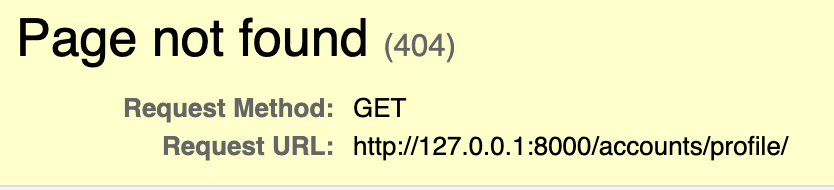

### above we see it trying to access the /account/profile
- we are going to add a profile route soon and he also doesn't want to route to the profile page when they login he thinks it would be better to route them to the home page of the website
- django has it set up so that when the login is successful, it tries to navigate to that location, but we can modify that using our settings
- project -> settings.py -> create new setting at bottom
    - LOGIN_REDIRECT_URL = 'blog-home'
    - with this in place it should work to login and get redirected to the home page
    - that works but as of now there isn't any visual feedback letting us know that we logged in successfully but we will fix that 

### Now that login page is working, we will change our register route so that users are redirected to the login page after they register... then they can login after registering
- they can login with their new account and make sure their account is working


### Getting our logout page working as well
- we go to the project urls where we added the login/logout routes
- he temporarily removes the template name argument for the logout html to show us the default logout view that django provides
- it basically was a logout admin page and if they went to login again it took them to the admin login page which is not what we want because we want this to work for everyone on the front end
- thus, we will make the logout.html template alongside the others in the users directory

#### first we will tell the logout view that we want to use a different template (template name arg in the url pattern path function for the logout route
- he creates the logout.html and uses the registration template as a starting point
- gets rid of the form stuff because there won't be any forms for this view
- He leaves the link for if the user already has an account they can login
- got the login and logout pages working

### Now we are going to modify the navigation bar so that it changes based on whether someone is logged in or out because if someone is not logged in yet they should have a login link somewhere on the page

### If someone is logged in then they should see a logout page somewhere on the page instead of a login page
- we can open up our base template and put in a conditional that checks whether the user is logged in or logged out 
- currently our navigation links to the register and login pages don't actually go anywhere because when we created the base template we hadn't yet created those routes
    - now we only want to see the login and register links if the user isn't logged in because if they are logged in then we know that they don't need to register or login
    - Django makes this easy for us by providing by providing us with a user variable that contains the current user and it has an attribute called isAuthenticated that allows us to check if the user is currently logged in or not 
        - in the navigation bar we can add a conditional 
        - if user is logged in then we only display the logout and we will add that url


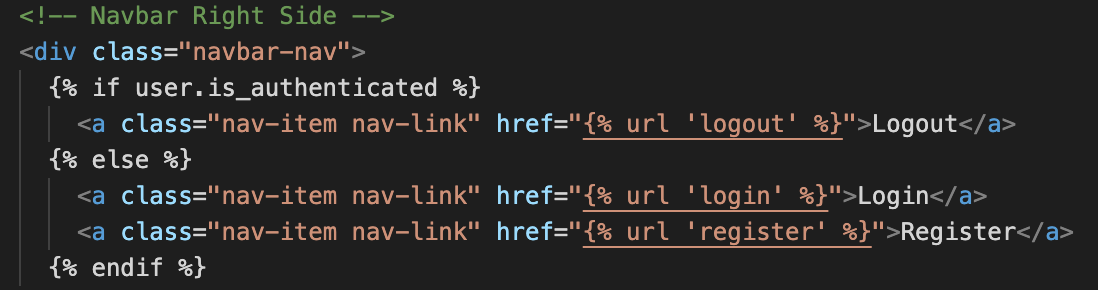

### The last thing we will be learning in this video is how to put a restriction on certain routes so that you can only go to those routes if you are currently logged in
- we will create a route for the users profile so that they can access after they have logged in
- first we will create this route to their profile 
- project -> user routes
- we want to create a page for a users profile so first we will create that view within users views so we open that up
    - create the profile view first by defining a function that just renders the template we are about to create 
    - use the login template as a starter template 
    - we delete everything in the content block and print out the users username
        - we don't have to pass that into the context that is something that is built into django that represents the current logged in user
- now we will create the route in our url patterns that will route them to the profile page 
    - we will put this in our project urls.py 
    - that should make that view accessible on our site
    - we will also add a link to this on the navigation bar if the user is logged in
        - we go to the blogs base.html where the navigation bar lives 
- it is working so far but there is an issue
    - if he logs out there is nothing preventing you from manually going to the profile view 
    - we can navigate to the page but we don't get anything on the screen because it doesn't have a current user and doesn't know what username to display
        - we want to put a check in place that makes a user login before they can access the profile page
        - to do this we just use a login required decorator that Django provides for us 
        - we go back to our user views and the profile view function and we want to require the user is logged in before they can see this profile view
        - have to import the login required decorator
            - from django.contrib.auth.decorators import login_required
        - add the decorator above the function
        - decorators add functionality to an existing function
    - if we try to navigate to the profile page when we are not logged in we get a 404 not found error because by default Django is not going to our login page
    - we basically have to tell Django where to look in this case
    - we can add a login url variable to the settings.py module
    - LOGIN_URL = 'login'
- 127.0.0.1:8000/login/?next=/profile/
    - you can see it is keeping track of the page we were trying to access and it will go to the profile page once we have logged in because that is what we were originally trying to access but couldn't because there was not a user that was logged in

        

# Video 8: User Profile and Picture
- we are going to keep working on the profile page and add the ability to upload a profile picture for our users
- extend our user model to add more fields and we will also learn how use Django signals to run specific functions after certain actions which can be extremelly useful for this type of work 
- first of all by default the default users model that django provides for us does not have a field for a profile picture 
    - we are going to have to extend the user model and create a new profile model that has a one-to-one relationship with the user
    - a one-to-one relationship means that one user can have one profile and one profile will be associated with one user 
- this will be a new model in our users app and when we created this app it created a models.py for us
    - we will be extending the user model that django provides for us so we need to import that so we can inherit from it in the new model
    - we create the Profile class 
    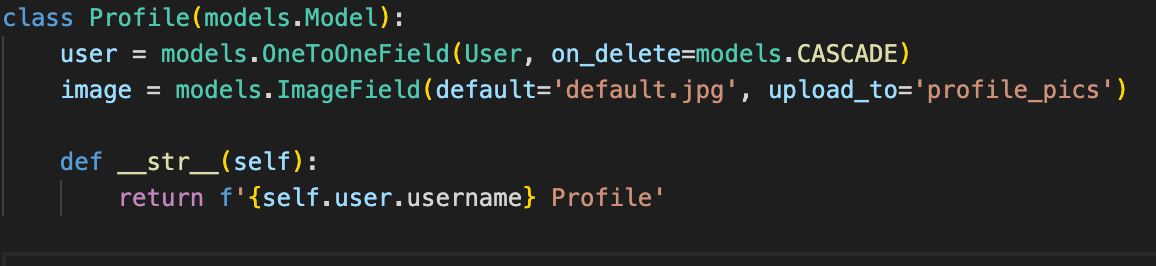
- the on_delete argument tells Django what to do with the profile if the user is deleted
    - CASCADE means that if the user is deleted, then also delete the profile but if we delete the profile then it won't delete the users
    - after a user is associated with the profile, now we can add any additional fields that we want
        - he is adding a profile picture -> image
        - default image is default.png and that will be the default for any user
        - upload_to='profile_pics' -> profile_pics will be the directory that images get uploaded to when we upload a profile
    - next we create the DUNDER method so that when we print this out it will display how we want it to be displayed -> if we don't have it when we print it will just was profile object and we want it to be more descriptive than that 
- anytime we create a change to the models it is going to create a change to the database but it hasn't made any changes yet -> need to run to migrations for changes to take effect
- bring up terminal and run migrations -> python manage.py makemigrations
- we get an error because we don't have Pillow installed which is a library for working with images within Python
- install it 
- makemigrations and then have to run the migrations for the changes to take place in the database
    - python manage.py migrate
- now we want to be able to view the user profiles on the admin page for our website so we can see what this looks like
    - however, we have to register this model within the admin file of our app
    - go to users app and within the admin.py and import the model we just created 
        - from .models import Profile
        - admin.site.register(Profile)
- now that we have to registered with admin we run our development server and try to add a profile picture for one of our users 
    - we create two profiles and upload an image for one of them and let the other use the default image
- shows us how we can access these profiles and images on our site
    - stops the server for a minute and runs the django shell so we can work with a profile interactively
        - python manage.py shell
        - imports the built-in django user model -> from django.contrib.auth.models import User
        - grabs a user -> user = User.objects.filter(username="caseyquinn20").first()
    - now that we have created a profile for this user it has a one-to-one relationship with the profile
    - this means we can access the profile directly from the user 
        - user.profile or user.profile.image
- on our website, we won't be accessing our image directly, will instead be accessing the location of the image
    - for HTML, how you do images is you pass in the location to the source attribute of the image tag in order to display it in the browser
    - how to get the location of the image -> __user.profile.image.url__

### Checking where the images are actually being saved
- Within the Blog_site dir, there is a new folder called _profile_pics_ where the image was uploaded to and that is what we designated in the profile model for the image field function call
    - he doesn't actually think this is a good location for our images because if we had different models all uploading to different directories it would clutter up our directories
    - we will change some setting so we can change the location of where some of these images are actually saved
    - we need to also change some other settings so the website can find these images when we try to view them from within the browser
        - navigate to projects settings.py file 
        - need to define media root and media url 
        - MEDIA_ROOT is going to be the full path to where we would like Django to store uploaded files
        - for performance reasons, these images are stored in the file system and not in the database
        - make a directory called media within blogsite home dir
            - MEDIA_ROOT = os.path.join(BASE_DIR, 'media') -> what we are doing here is using that os.path.join method which will make sure the full path to that directory is created no matter what operating system you're on
            - BASE_DIR var is a variable that Django created in our settings that specified the location of the projects based directory 

#### recap: MEDIA_ROOT is where our uploaded files will be located on the file system.. like we said above we passed in _profile_pics_ as the location in the profile model so now that folder would be created inside this base media folder 

#### MEDIA_URL is how we are going to access that image in the browser so it will be at /media/profile_pics and then the name of that image 
- we have to actually go remove those profiles and recreate them for those changes to take affect


#### Now we will see how we can display all of this in the profile page we created in the last video
- nav to profile template in the users directory 
- we want it to have the username, profile pic, email address, etc..
    - also want the ability for the user to update this information
- grabs a code snippet called profile.html and uses the user to access the necessary needed fields

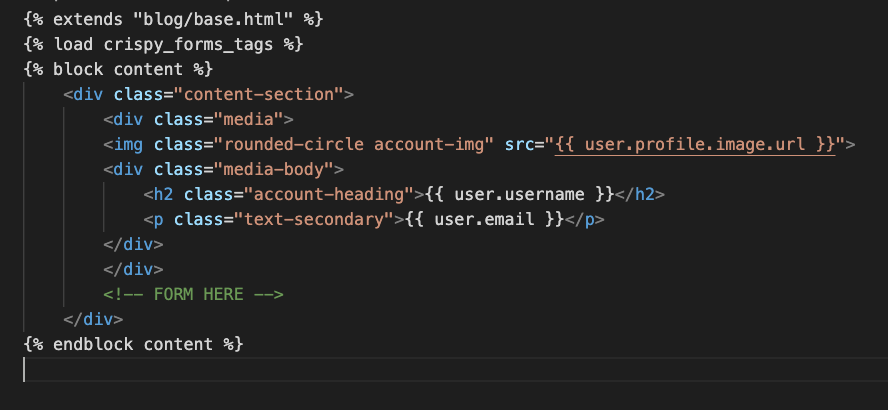

### In order for this to actually work we still need to add those media routes to our url patterns
- there are different ways to do this in development and production 
- he references the Django documentation for what they say to do during development
    - basically just adding a code snippet after the url patterns
https://docs.djangoproject.com/en/4.0/howto/static-files/#serving-files-uploaded-by-a-user-during-development

- now it should work within the browser

### We want to upload a default image for a any user that has not uploaded one themselves.
- When I followed what he was doing for the default profile picture in the tutorial it was not working so I read some Django documentation and found a way to accomplish that in the profile template.html using some conditional logic.

### Now we want to make sure that for every new user that is created, they automatically get a profile as well that includes the default profile picture
- The way that it is set up right now we have to use the admin page to manually create a profile for each of our users.
    - Add something called a Django signal and create a new file in our users app called _signals_ where we can write this. Some people put these signals in the models.py where we created the profile model, but Django doc recommends doing it this way due to side effects of how imports work.
    - We will import a signal called __post_save__ which is a signal that gets fired after an object is saved. In this case, we want to get a post_save signal when a user is created 
    - from django.db.models.signals import post_save
    - We also need to import user then. The User is going to be what we call the _sender_ because it is sending the signal 
    - We also need to create a _receiver_. A receiver is going to be a function that gets this signal, and then performs some task. So we import receiver module.
    - Lastly, we need to import Profile from our models because we are going to be creating a profile from within our receiver function 
    - Now that we have all these things imported, we can tie all of these things together because we want a profile to be created for each new user 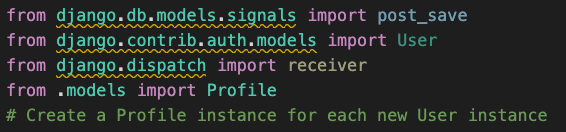

    

### We write the create_profile function that we want to run every time a user is created. 
- However, we haven't tied that functionality together yet. To actually do this, we are going to use the receiver that we imported. That receiver is going to be a decorator that we can add to our function
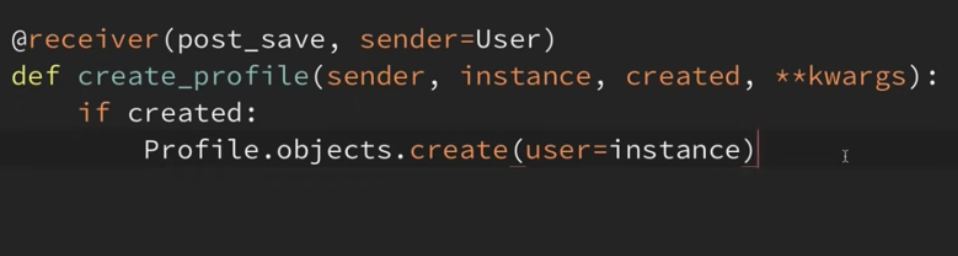
- See handwritten notes for drawn out explanation on how the function works. Short version is the function is the receiver of a signal (post_save) that was sent by a User instance. Whenever a User is created, this signal will be sent and received by the function and it will create a Profile object for the User that was passed in as the instance. 

### While we are at it, we are also going to create a save_profile function that saves our profile every time the User object gets saved. Will be almost identical to function above.
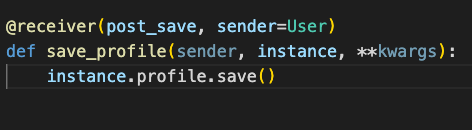




### After creating our signals, there is still one thing we have to do for this all to work. We have to import our signals inside of the ready function of user app.py file
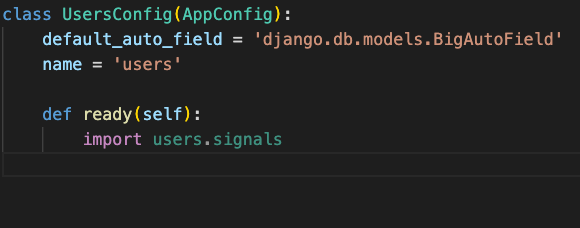

### Now we create a new User to see if these changes work to automatically make the profile for a User when it is created. :)

# Video 9: Update User Profile 

### In this video, we are finishing up our Profile page and making it so users can update their profile if needed and also upload a new profile picture as well as automatically resizing images so we don't have massive pictures on the file system when the site is only displaying small images on the profile page 

- In order to update our User and Profile, we are going to need to create some forms. 

### Within users app, we open the forms.py file. Here we are going to make some additional forms.

#### Creating a model form that will allow us to work with a specific database model. We want to update our User model. In the UserUpdateForm, we can use the User register form, but we do not need the password fields. Notice we don't have the profile picture listed because that will be in the profile model. Thus, we need to create additional form but since we are working with profile model, we first need to import that.

#### We then write the ProfileUpdateForm which will allow us to update the profile picture for a user
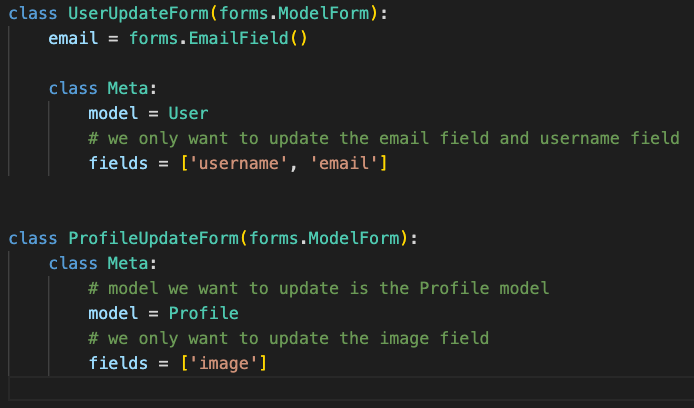
#### Whenever we put this on the template, it is just going to look like one form. 

### Now we go to our views (within user) so we can add these forms to our profile view
- First we add the forms that we just created by importing them. 
- Now within the profile view, we create instances of the UserUpdateForm and ProfileUpdateForm
- Now we will pass this into our template. To do this, we can create a context (dict) and the keys will be the variables we are going to access within our template 
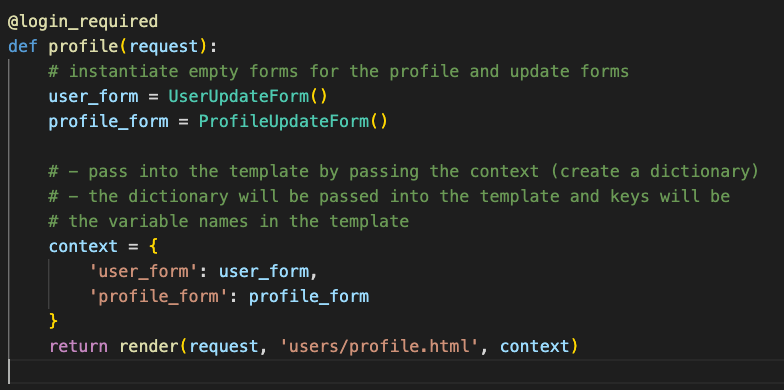

### Now we will open our profile template and print out these forms. We did this once when we created our register page
- He grabs the form section from the register.html as a starter to use in the profile.html template. He pastes it at the point where it has the comment FORM HERE...
- Within our profile template we are actually going to have two forms with different fields; however, we are going to put both these fields within a single html form so user sees it as one..
- First form is for user update and second form is for profile update
- One special thing we need to do is add a special encoding type to our form. We have to do this in order to for our form to pass our image data for our profile picture properly.
- At the top of form within tag we have to add _enctype="multipart/form-data"
- We check and it is working but one thing he notices is that the forms are not currently populated with the users information. If you are updating your username and profile, you are going to want to have your current information filled in already so you can see what it currently is. We also aren't doing anything with this information when it is filled in just yet. When we submit forms it will do a post request back to the same route with the data from the form. We will address some of this within the views. We go back to our user app views

#### First we will populate the forms with the information of the current user. These are model forms that are expecting to be working on a specific model object. Thus, we can populate the fields of the form by passing in an instance of the object it expects (user, profile)
- making these changes will populate the forms with the users current information

#### Just like with our register route, we are going to want to make a check whether it is a post route or not. If it is, then we will want to see if our forms are valid. If they are valid, then we will save that information. 
- we add the conditional that if it is a POST request, we will create the form for that user and add the request.POST argument which tells it to update that information for that user 
- For the ProfileUpdateForm we also add the argument post.FILE to handle the image that is going to be getting submitted 
- Now that we have both of the forms populated with the data that is going to be submitted, we can check if they are both valid. If they are both both valid, we are not going to save any of the data. 
- Once the forms have been validated and updated in the database, lets give our user some feedback that everything is going to be ok in the world and they don't have to cry themselves to sleep every night even if they really really really want to (what am I doing right now) lol
    - Send a flash message and redirect then back to the profile page 
    - You want to do a redirect instead of letting it fall down to the render function call because of POST-GET redirect pattern. Redirecting causes the browser to do a GET request and we don't get the wierd message if we try to reload the page
    - SAVE AND TEST

#### How to resize images when they uploaded using a package called PILLOW: 
- We are going to override the save method of our profile model 
- So within user->models.py in Profile model
    - we override the save method. The method already exists in our parent class but we are creating our own so we can add some functionality
    
#### Now we will spice up the home page a bit by displaying the author's profile pic by each post
- blog -> templates -> home.html
- will add an image tag with some CSS classes that we added earlier 
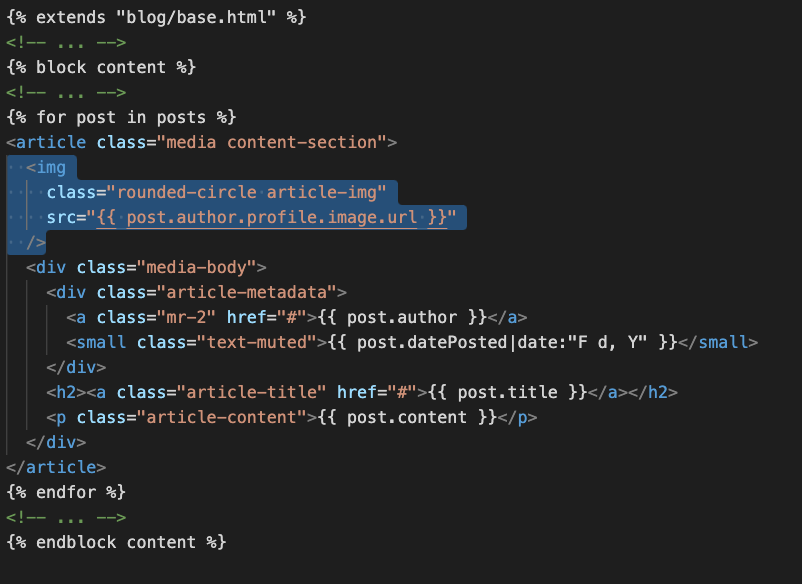

# Video 10: Create, Update, Delete Posts

### In this video, we are adding the functionality that allows users to create, update, and delete posts that will show up on our homepage

### We will also start working with class-based views and see how they can be useful

#### So far in this series, we have been using function based views. Our url patterns are directed to a certain view which are these functions handle the logic for the routes and then render our templates

#### Class-based views have a lot more built in functionality that will try to handle a lot of the backend logic for us 
- Going to create a class-based view for our home page so we can compare how it looks with our function view.
- There are different kinds of class-based views.. There are list views, detail views, create views, update views, delete views
    - For example a blog site is going to have a list of posts so this would be a list-based view.. Another example would be a YouTube subcription list. However, when you click on one of the videos or a blog post it routes you to the content which has much more detail for that specific thing, so that would be a detail view.
    - Django tries to anticipate this by doing some of this background work for us 
- Right now we have a homepage that gets all of our POST objects and passes them to our html template to display all of them there
    - This makes it a good candidate for a list view since our home page is listing all of our blog posts

#### We will rewrite the home view as a list view so we can compare
- In order to use this list view, we open up our blog urls.py module and say we want to use this PostList view instead of our home function
    - within the path you cannot just pass in the class itself, it has to be converted to a view. 
    - there is a method available to do this called as_view()
- It doesn't initially work because by default, class-based views look for templates of a certain naming pattern 
    - blog/post_list.html  ( -app-model-_viewtype-.html)
    - we can change which template we want this view to use within views.py
    - we create the template_name = 'blog/home.html' ; however, even with this change in place it's not going to work for us just yet because it doesn't know what we want the variable to be named in our template 
        - by default, our list view is going to call that variable 'object_list' instead of 'post'... so we can either go into our template and change it or set one more variable in our list view and let our class know we want that called 'post' instead
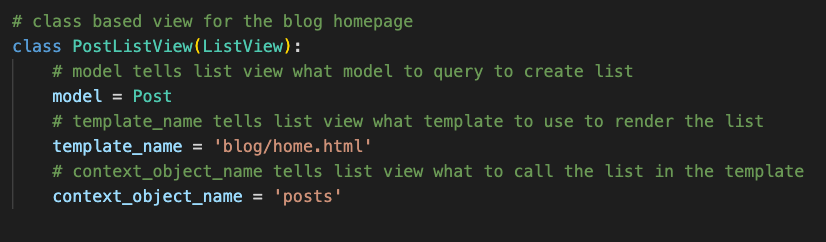

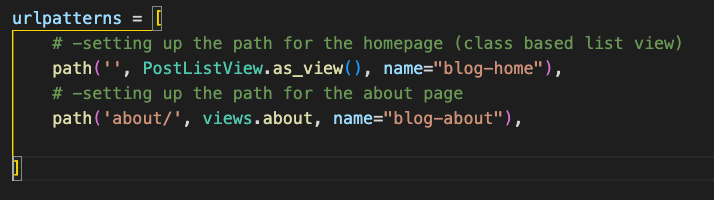

### Right now the ordering of our posts is incorrect..The oldest post is actually at the bottom and we want it to be at the top

#### Going to need to change the order our query is making to the database
- We add the ordering attribute to the class and set it 
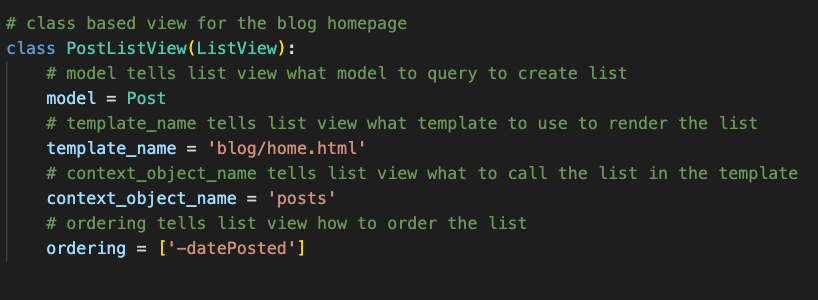

## Now we will create a class based detail view for each individual post
- We create the PostDetailView which inherits from DetailView and set attribute model = Post from our models
- Now we set the url pattern so we go to urls.py in blog app and import the PostDetailView class from the views.py module
    - We need to create a route that takes us to a specific post and to do this we are going to use something that we haven't seen yet
    - We have to create a url pattern that contains a variable
        - Lets say we wanted to view the page for blog 1 it would be something like post/1 etc.. and django give the ability to add variables within our actual routes
    - If we wanted to create a route where the ID of the post is actually part of the route, then we can create a route that looks like the following picture
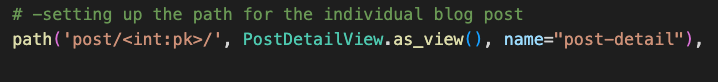
- Specifying that pk variable allows us to grab that value from the url and use it in our view function or in this case the class-based view 
- The detail view expects that variable to be pk in order to go grab that specific object 
- Lastly, we need to create a template that will display our post details
    - The class based view will be looking for a template with the convention ( -app-model-viewtype-.html) --> blog/post_detail.html
    - The template will be very similar to home.html except we will only be display a single post so we use that as a base and delete the for loop.
    - We also need to change the variable name that it is using because it is expecting 'object' by convention
    - It works if you go to http://127.0.0.1:8000/post/1/ so we can see we have pages for each individual post; however, we need to add routes for the individual posts on our home page (right now they are just dead links because he was waiting until we had these up and running
    - These are within the home.html template -> {% url 'post-detail' post.id %}
        - The post.id will get passed in as the primary key in the url



## Now that we have a list view to list our posts and a detail view to get a specific post, we will make a create/update/delete view so we can do all of those things on the front-end

### First we will see how users can create a new post 
- We go back to views.py in blog application
- For the create view he is going to grab the detail view and modify it a bit
- It will be a class-based view that is inheriting from CreateView class and it will be a form so we add the fields that we want in the form (title, content)
- now we will update our urls with this new create view
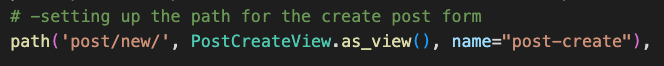
- At this point, we know that we need a template for this view, but it might not be named what we think it is going to be named
    - Since it is going to share a template with the Update view, the name will be as follows:
        - post_form.html
    - This template is going to be really similar to our templates that create forms that we have used so far so we are going to use the register template as a starting point
    - We paste that in and then doctor it up a bit. All we did was change the legend to 'Blog Post' and then changed the button to 'Post' 
    - We then navigate on the site to 'http://127.0.0.1:8000/post/new/'
    - If we try to make a post right now then it gives an integrity error saying it doesn't have an author_id (author is null) -> every post needs an author and we want the author to be the current logged in user but it doesn't know that 
        - The way we can do this is to override our form_valid method for our Create view and that will allow us to add the author before the form is submitted
        - basically when we override the form, what we are saying is hey you know that form that you're trying to submit? Before you do that, take that instance and set that author equal to the current logged in user
    - It still actually will not work. We are getting a different error that says we don't have a redirect url -> telling us it created the post successfully but it doesn't know where we want to be redirected to now ( we go back to the home page and the post was actually created so that is a positive )
    - Just need to let the view know where to redirect and ideally we would go to the detail page of the post that we just created and that's actually what it tried to do it just doesn't know how to do it. 
    - The way to tell Django how to find the url of a model object is to create a get_absolute_url method on the Model that returns the path to any specific instance 
    - We go to the Post model in our blog models and we need to create a method so that Django knows how to find the location to a specific post 
        - first we are going to be getting the url of a particular route and in order to do this we need to use the reverse function (not using redirect because redirect will actually redirect you to a specific route but reverse will simply return the full url to that route as a string 
        - in this case we simply want to return the url and let the view handle the redirect for us (we import the reverse from django.urls)
    - Lastly, we shouldn't be able to create a post unless we are logged in as some user 
        - We'll make it so that if we try to access this route and we are not logged in, we'll just be redirected to the login page
        - We saw how to do this with function views; however, we have not yet done it with a class-based view 
        - we can't use decorators on classes so what we are going to use is something called a login mix in which is basically just a class that we inherit from that will add that functionality to the view 
        - import: 'from django.contrib.auth.mixins import LoginRequiredMixin'
        - we add this to the classes that we are inheriting from so we want to add this to the PostCreateView in the views on the far left 
        


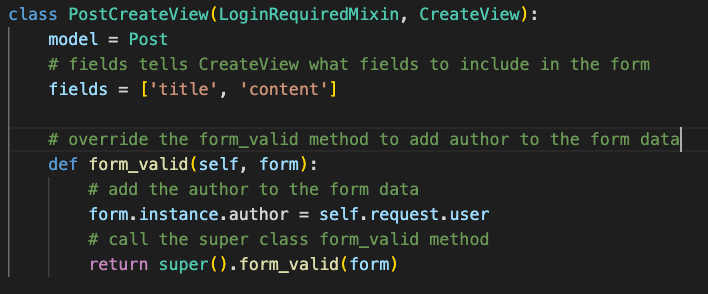

## Now we will create an update view so that we can update Posts on the front-end.

- Copies the CreateView as a starting point because the UpdateView is going to be very similar
- Adds a path to our URL patterns in blog app
    - now for example if we navigate to post/5/update it loads the update view with that posts content already in it
    - we need to think about how a user may use the application or potentially try to abuse it. Right now we have a login check on being able to update a post/create a post but we aren't checking if the author of the post is the one trying to access the update page. This is important because we don't want a user to be able to update someone elses post
        - to fix this issue we are going to use another mixin
        - we go to views and import the mixin : UserPassesTestMixin -> once we have this in place we can create a method called test_func and that is a function that our UserPassesTestMixin will run in order to see if our user passes a certain test condition
        - now we should be able to prevent users from updating other users posts

# Now we will create a view for deleting posts
- this is going to be very similar to our detail view so he goes back to the views and imports the DeleteView and uses the class PostDetailView as a starting point
- we copy the test_func method from the UpdateView because we want to run that same test so a user cannot delete someone elses posts 
- we add a path to our URL patterns for the DeleteView
- now this needs a template and the template that this expects is just a form that asks if we are sure that we want to delete the post and if we delete the post then the post will be deleted
    - post_confirm_delete.html
    - he copies from the post_form template that was used for the create and update templates
    - he changes the legend and also removed the load crispy forms at the top and the {{ form | crispy }} 
    - we need to ask the user if they really want to delete the post
    - next we change the button to be Yes, Delete with danger outline
    - we also add an anchor tag for if they want to cancel and it redirects them back to the post detail view
    - we also add a success url so it knows where to redirect to after deleting a post
    

# Now we make a few changes to the site to get everything working together better
- All of this functionality is working but we don't have any links to get to these routes that we just created 
    - first put a link in nav bar to create a new post -> within base.html template of our blog
    - user must be authenticated to write a post so we put in that part of the conditional 
    - next he adds links to update/delete a post and decides that a good place to put them is in the post-detail page
        - if the user is the user that wrote the post, then they will see links to update and delete the post if they'd like (post-detail template)

# Video 11: Pagination

## Adding some functionality to the site by adding some pagination so that we aren't pulling down too many posts at once. We will also learn how to create a page of posts filtered by a specific user that is also going to be paginated

- We add dummy posts to see how to pagination affects everything.
    - In order to do this I am using the json file that he provided in order to get the posts into the site (do this in the shell in the terminal )
- we will use a paginator object and we check it out in the shell interactively
    - open up the python shell
    - import the Paginator class -> from django.core.paginator import Paginator
    - posts = ['1', '2', '3', '4', '5']
    - split so it is working with twp posts per page
    - p = Paginator(posts, 2)
    - p.num_pages ---> 3
    - for page in p.page_range:
        - print(page) 
        - 1
        - 2
        - 3
    - access specific page: p1 = p.page(1)
        - p1.number
        - p1.object_list
        - p1.has_previous()
        - p1.has_next()
        - p1.next_page_number()
- that was a quick rundown.. now we want to use this in our views and templates in order to paginate our posts
    - open up our views in blog
    - within the home view (PostListView) we set an attribute called paginate_by = 5
    - we see we don't have links to any of the other pages -> solution to this is to add some links in our template so we can navigate by clicking on them rather than by manually typing into the url bar like we are right now
    - in the base.html we added a bunch of logic at the end to create the pagination (reference this) 
- now we are going to build a route so that if a user clicks on a username (which is currently a dead link), then it will send them to a page with all of that users posts only
    - it is going to be very similar to the home list view that we currently have but we are going to filter that list by that user -> we start by copying that home list view
    - we want to add a filtyer that only gets the posts from a certain user
        - this will come directly from the url: when we get a new url pattern for this we will specify the username and the url path itself
    - in order to modify the query set that this list view returns we can override a method called get_query_set and change the query set from within there
    - then we create the path in the url patterns that contains the username parameter -> blog urls
    - after creating the view and the url pattern we just need to set up the template which is basically going to be the same as the home-list view we already have (user_posts.html)
    - he adds a heading at the top specifying that it is that users page 
    

# Video 12: Email and Password Reset 

## In this video we will be learning how to use email to allow users to reset their password. Django has built-in functionality that can generate a secure token to ensure that only a specific user can reset their password and then we will see how Django can send a email that has instructions for a user to reset their password

- we start off in project urls.py module and add some built-in Django views
- password reset views are built in to the auth views that we have already imported
- we are going to create a few different paths using these built-in views 

- create url pattern called password reset -> view that provides a form for our user to fill out that will send a password reset instruction to their email
    - create password_reset template ( users/templates/users )
    - we use the login as a starting point and make a few changes (
- Now we need to create the page for after this form is submitted successfully -> route that confirms the email has been sent and tells you to check your inbox
    - go back to project urls and make the route
    - now we create the password_reset_done.html file after making the route in the urls.py module
    - this is just going to be an informative page and there won';t be any forms ( copy logout template and reuse most of that )
    - next we go to the password_reset route in the browser ( right now if we try to submit the form it is going to give us an error because it is trying to reference a path that doesn't exist yet - error occurs in the template password_reset_email.html which is a template that Django is using in the background to create the email that to send to the user so they can reset their password.. And when it's trying to create that email from the template it runs into an erro because we don't have a route called password_reset_confirm.. its also trying to pass two different things into the URL paramters  uidb64=uid token=token which we need to accept in our url so that we know that the user that requested the password reset is the person that is trying to access that page - adding a layer of security to these routes - uidb64 is the users id encoded in base64 and the token is the token to check that the password is valid )
    - we go to create the route that it is looking for - project urls.py module 
        - create route for password_reset_confirm and we add the two paramaters described above 
    - now we create the password_reset_confirm.html file - this one will have an actual form for the user to reset their password ( uses the password_reset form as a starting point ) - He changes the text that is on the submit button
    - now we retry and see if we get the same error - now we get a different error ( ConnectionRefusedError at /password-reset/ ) and this error is less helpful -> what is happenening is that it is trying to send an email but it is failing - we do not currently have an email server so at this point we have some choices that we can make - he is going to be using gmail in this video 
    - we may have to let Google know to expect signins form a Python application ( if you have two-factor authentication than you can create a password specifically for the application that you want to sign in from and that is what he did ) 
    - remolbpubyyirdlj
    - we go to projects settings.py module and scroll to the bottom to set a few more environment variables
        - put in all the environment variables under the comment # all the settings for email 
    - now we go back to the browser and try to reset the email again
    - we get an email with directions to reset password and those two required parameters were generated for us and they will only be correct if it is the right user
    - change password to Shelby2022
    - get the following error : NoReverseMatch at /password-reset-confirm/MQ/set-password/ which basically then says Exception Value - Reverse for 'password_reset_complete' not found. 'password_reset_complete' is not a valid view function or pattern name.
    - we just need to create one last route which basically says that the password has been successfully changed and that the user can login with a new password
        - open up project urls.py and create the last route
        - go to user templates and create password_reset_complete.html and it is just going to be informative so it is very similar to our password_reset_done.html template so we use that as the starting point
     - password-reset -> password-reset-done -> email -> password-reset-link -> password-reset-confirm template -> password-reset-complete page (final page in the process) -> sign in 
     - the last thing that we need to do is create a link for the user to reset their password and most websites allow the user to do that on the login page 
         - we go to the login template and put the link there
     


# Linux/Mac Tutorial : 

# Linux Deployment : Video 13
- Right now our application is only running on our local machine but we want to get it running for anyone that has access to the internet 
- Deploying to a linux server with a company like Linode - will give a lot of room and freedom for the app to grow but it is the most complex to set up
- have to make a correction : users/models.py 
- ssh 'd into the server from the terminal (see video for command)
- set host name : hostnamectl set-hostname django-server 
- check if it worked by : hostname
- set hostname and hostfile : nano /etc/hosts
- IP address : 96.126.122.141 _tab_ django-server
- now we want to add a limited user : right now we are logged in as root user and has unlimited priviledges -> its best practice to add a new user that has limited access
    - adduser caseyquinn
    - pw: Bebop2022
- we want the user to run root commands (use sudo) - simply say : adduser caseyquinn sudo
    - now we have added a new user on the linux server and now we can login as that user (this is best practice because if logged in as the root user there are a lot of things that you can easily mess up )
- we exit : exit , and then log back in - ssh caseyquinn@96.126.122.141
- now we want to set up SSH key-based authentication so that we can login to our server without a password - by default we are using a password to login to our server but instead we want to use key-based authentication which is more secure & more convenient bc it uses keys that cannot be brute forced and it also allows us to login without putting in a password every single time
- WATCH video SSH key-based authentication 
- So we are currently logged in to our server and in the home folder and we are going to want to make a directory : mkdir -p ~/.ssh

## Going back to local machine
- Now we are going to go back to our local machine
- ssh-keygen -b 4096 
- passphrase : Shelby_Lohr
- what we are going to want to do is put our public key on the server so that we can login without our password because the two keys in the picture below are going to match 
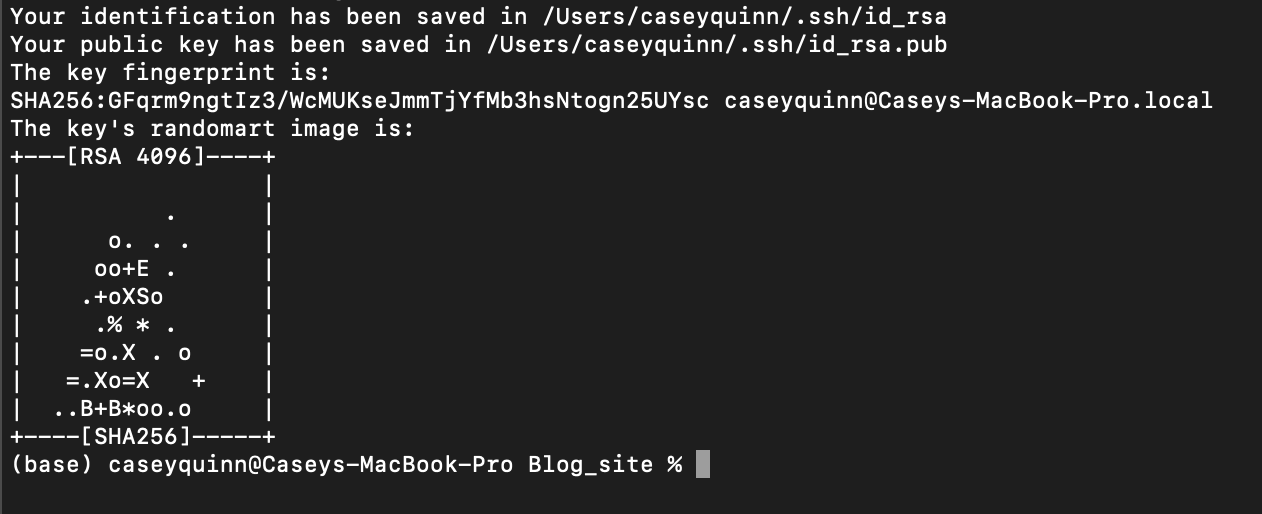
- now we need to get the public key to our server - since we are using bash we can an scp command
    - scp ~/.ssh/id_rsa.pub caseyquinn@96.126.122.141:~/.ssh/authorized_keys ( we want to copy this file up to our server after : we are specifying the location of where to save in the server and we save the file as "authorized_keys" )
    - the file was copied over
    
## Going back to the server 
- if we do an ls on our .ssh directory we should be able to see the file with the keys as authorized keys
- now we need to do some permissions (setting the permissions for the ssh directory so that the owner has read/write/execute permissions and owner of files has read/write permissions on those files 
    - sudo chmod 700 ~/.ssh/ 
    - sudo chmod 600 ~/.ssh/* ( 600 command on all of the files )
- now we should be able to logon without a password so he exits 
- the ssh keys are now working with the passphrase

### there are a few more things that are best practice to change before finishing things out 
- We want to not allow root logins - we just want to be able to login as users 
- Key based authentication
- sudo nano /etc/ssh/sshd_config  (don't want people to be able to login as root user)
    - first thing we change is PermitRootLogin (set it to no) and then also PasswordAuthentication (set to no)  then save (control-x)
- now we need to restart the ssh service so we do that by : 
    - sudo systemctl restart sshd
    - * sudo systemctl start ssh
- set up firewall:
    - sudo apt-get install ufw
- we will set up a few basic rules 
    - sudo ufw default allow outgoing
    - sudo ufw default deny incoming (can lock you out of your server unless you explicitly allow ssh - be sure you configure next allow rules for ssh and http before applying the changes
    - sudo ufw allow ssh 
    - he doesn't allow http right (he is going to test the site first) 
    - he will allow a port (we currently run on 8000 for our dev server so we allow that right now)
    - sudo ufw allow 8000
    - now we need to enable these :
        - sudo ufw enable 
        - sudo ufw status (check everything that is being allowed)

## Now we are ready to actually deploy our application on the web server
- there are a lot of ways to get this on the server 
- since we are using a virtual environment we need to capture a Requirements.txt file that lists everything that needs to be installed to use our application
- he said he would activate that virtual environment and then create that requirements.txt file from the environment
- pip freeze command gives us all our dependencies
- pip freeze > requirements.txt 
- now we want to put that requirements.txt file into our application
- now we need to put the application onto our web server 
    - put in home folder on the server :
    - scp -r Blog_site caseyquinn@96.126.122.141:~/
### We go back to the server and can see that it was copied correctly
- now we are ready to get it running on here 
- we are going to create a virtual environment that is going to run our application 
    - sudo apt-get install python3-pip
    - sudo apt-get install python3-venv
- now we create the virtual environment : python3 -m venv Blog_site/venv
- now we will activate that virtual environment so we can install all of our dependencies 
- cd Blog_site , source venv/bin/activate
- pip install -r requirements.txt
- we need to change some settings in Django so we can test our application on the linode server
    - sudo nano Blog_site/settings.py
    - within ALLOWED_HOSTS we need to put in the IP address of our server
    - we scroll to STATIC_URL and he talks about how earlier in the series he explained that static files are handled differently in development than they are in production ( in production we have to put in a place where the static files are going to exist ) 
        - he adds : STATIC_ROOT = os.path.join(BASE_DIR, 'static')
    - to get the static files working on the server we have to do the following command 
        - python manage.py collectstatic
- now we are going to test it by running the development server - we are going to open it up on our Linode server here to where we can access it from the outside
    - python manage.py runserver 0.0.0.0:8000
    - because we specified 0.0.0.0 as IP address we should be able to go to our IP address and run it on port 8000
    - 96.126.122.141:8000 - we can now see that the blog is available thru the web browser
    - this should be accessible to anybody 

### It is running at address above and we do some tests 
- adding a new user 

### after doing tests we will kill the server we were running and now we want to run a server that is more reliable
- in this video he is going to use apache but there are different options available
- first we need to install apache (which will be our dev server) : sudo apt-get install apache2
- then we will install something called modWSGI (what allows our web server (Apache) to talk to python and our web application : sudo apt-get install libapache2-mod-wsgi-py3
- now we need to configure our apache web server : 
    - cd /etc/apache2/sites-available/ ( this is where the apache configuration files live )
    - he is going to use one of the default configuration files as a starting point
    - sudo cp 000-default.conf django_project.conf
    - now in order to edit the file : sudo nano django_project.conf (what we have initially is a default configuration file for apache)
    - we add in a few of our own rules 
    - we are going to use an alias to tell apache to map requests starting with static to our apps static folder
    - Alias /static /home/caseyquinn/Blog_site/static
    - now we want to give some permissions : 
        - <Directory /home/caseyquinn/Blog_site/static> Require all granted </Directory>
    - doing another for the media directory 
        - Alias /media /home/caseyquinn/Blog_site/media
        - <Directory /home/caseyquinn/Blog_site/media> Require all granted </Directory>
    - now we need to grant access to wsgi.py file within our project which ensures apache can talk to our webserver
        - <Directory /home/caseyquinn/Blog_site/Blog_site>
                <Files wsgi.py> 
                        Require all granted
                </Files>        
        </Directory>
    - now we are going to add the part that actually handles the wsgi part 
        - WSGIScriptAlias / /home/caseyquinn/Blog_site/Blog_site/wsgi.py

- now we will enable the site through apache
    - sudo a2ensite django_project
- disable the default site
    - sudo a2dissite 000-default.conf
- finishing the file permissions
    - have to enable apache to talk to our database (right now we are using sequel lite so apache has to be able to read and write from that file
        - make apache the group owner on this file: sudo chown :www-data Blog_site/db.sqlite3
        -  change permissions : sudo chmod - R 664 Blog_site/db.sqlite3
    - it is the same case for the media folder. If someone is uploading a picture then they need to be able to upload it
        -  sudo chown -R :www-data Blog_site/media/ (give apache the ability to write uploaded media to that media folder  
    - sudo chown :www-data Blog_site
    - sudo chmod -R 775 Blog_site/media

## Creating a config.json file to store sensitive information
- sudo touch /etc/config.json
- now we will grab the secret key from our application
    - sudo nano Blog_site/Blog_site/settings.py
    - we copy the secret key and then erase it 
    - "django-insecure-e^8ubat1aty!ei0$m)us1m4!7gg1e14d19o(p2%&m^4b9hs8cl"
    - then we go back and open up the config.json file we just created
    - sudo nano /etc/config.json : we add our secret key, email, and password
- now we want to update our settings.py file and pass in the values from that config file
    - sudo nano Blog_site/Blog_site/settings.py
    - we add : 
                with open('/etc/config.json') as config_file:
                    config = json.load(config_file)
    - this loads the json file as a dict so we can ac cess the secret key that we put in the config file 
- We set debug = false for production
- We change the email and password (remolbpubyyirdlj)
- We want to disable that port 8000 that we were using earlier for testing
    - sudo ufw delete allow 8000
- Now we want to allow HTTP traffic
    - sudo ufw allow http/tcp
- now we can restart our apache server and it should be good to go 
    - sudo service apache2 restart


# So that did not work : not getting permissions

# Video 16: Using AWS S3 buckets for file uploads
- learning how to use amazon s3 for file storage instead of local file system
- heroku doesn't have a standard file system for us to use - they require that we use s3 which is a file storage solution for a lot of websites 
- need to create a bucket : casey-django-blog-files
- once the bucket is created we are going to need to change some permissions with this
- we add a user on the service IAM : django_user
- we add some environment variables to .bash_profile file and then we begin to install some packages
    -

# Going to try option two and deploy it on heroku
- If you're saving images or files from your users then you'll need to use AWS or something for file uploads 